In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ace-class-assignment/Test.csv
/kaggle/input/ace-class-assignment/AMP_TrainSet.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
test = pd.read_csv("../input/ace-class-assignment/Test.csv")
test

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
0,4.0,3.704,0.873,73.519,0.987,-4.833,0,0.382,74.556,7.225,1.234
1,4.0,4.444,0.892,62.444,0.931,-0.584,0,0.320,56.056,4.942,1.853
2,2.0,0.000,0.901,47.000,1.039,-5.664,0,0.164,47.000,5.969,1.174
3,4.5,0.000,0.869,69.222,0.982,-5.423,0,2.010,69.222,5.462,1.138
4,-4.0,21.591,1.061,71.682,0.976,-2.002,0,2.758,66.000,5.582,1.453
...,...,...,...,...,...,...,...,...,...,...,...
753,-1.5,16.000,1.100,82.820,0.991,-1.987,0,15.185,85.333,7.053,1.325
754,-1.0,18.182,1.085,73.455,1.027,-0.745,0,16.550,74.667,6.729,1.132
755,-1.0,19.048,1.108,82.190,1.033,-1.789,0,16.112,79.667,6.036,1.219
756,-1.0,7.143,0.955,76.786,1.023,1.141,0,20.630,76.786,5.669,1.111


In [4]:
#read in the data
data = pd.read_csv("../input/ace-class-assignment/AMP_TrainSet.csv")
data.head(5)

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1


In [5]:
#Check the dimensions to the number of rows and columns
data.shape

(3038, 12)

In [6]:
data.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [7]:
data.dtypes

FULL_Charge           float64
FULL_AcidicMolPerc    float64
FULL_AURR980107       float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
AS_MeanAmphiMoment    float64
AS_DAYM780201         float64
AS_FUKS010112         float64
CT_RACS820104         float64
CLASS                   int64
dtype: object

In [8]:
#Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values
data.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


In [9]:
#number of null values in each column
data.isnull().sum()
#since my data has no null values then its good to go

FULL_Charge           0
FULL_AcidicMolPerc    0
FULL_AURR980107       0
FULL_DAYM780201       0
FULL_GEOR030101       0
FULL_OOBM850104       0
NT_EFC195             0
AS_MeanAmphiMoment    0
AS_DAYM780201         0
AS_FUKS010112         0
CT_RACS820104         0
CLASS                 0
dtype: int64

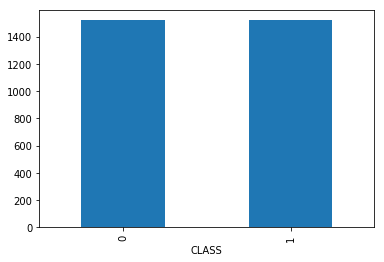

In [10]:
#need to know how balanced the class values are
data.groupby('CLASS').size().plot(kind='bar')

In [11]:
#Its a good idea to review all the pairwise correlations of the attributes in the dataset because some machine learning algorithm like linear and logistic regression can suffer poor performance if there are highly c orrelated attributes in the dataset
data.corr(method='pearson')

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
FULL_Charge,1.000000,-0.612996,-0.490977,-0.434603,-0.058725,-0.283758,0.088068,0.355477,-0.365374,-0.090570,0.232929,0.534602
FULL_AcidicMolPerc,-0.612996,1.000000,0.794796,0.541481,0.115201,0.513344,-0.143168,-0.431590,0.449621,0.002334,-0.213543,-0.598816
FULL_AURR980107,-0.490977,0.794796,1.000000,0.548253,0.346139,0.462712,-0.169540,-0.426097,0.456260,0.032958,-0.403599,-0.584111
FULL_DAYM780201,-0.434603,0.541481,0.548253,1.000000,0.010118,0.334778,-0.090058,-0.408793,0.894191,0.055915,-0.326792,-0.554838
FULL_GEOR030101,-0.058725,0.115201,0.346139,0.010118,1.000000,0.319157,-0.230417,-0.160269,-0.029085,0.040480,-0.151935,-0.260470
FULL_OOBM850104,-0.283758,0.513344,0.462712,0.334778,0.319157,1.000000,-0.230561,-0.336297,0.275640,-0.452769,0.155304,-0.453287
NT_EFC195,0.088068,-0.143168,-0.169540,-0.090058,-0.230417,-0.230561,1.000000,0.178683,-0.036844,0.145924,0.080898,0.260702
AS_MeanAmphiMoment,0.355477,-0.431590,-0.426097,-0.408793,-0.160269,-0.336297,0.178683,1.000000,-0.322378,0.025580,0.171524,0.693552
AS_DAYM780201,-0.365374,0.449621,0.456260,0.894191,-0.029085,0.275640,-0.036844,-0.322378,1.000000,0.045562,-0.256060,-0.437168
AS_FUKS010112,-0.090570,0.002334,0.032958,0.055915,0.040480,-0.452769,0.145924,0.025580,0.045562,1.000000,-0.445284,0.033432


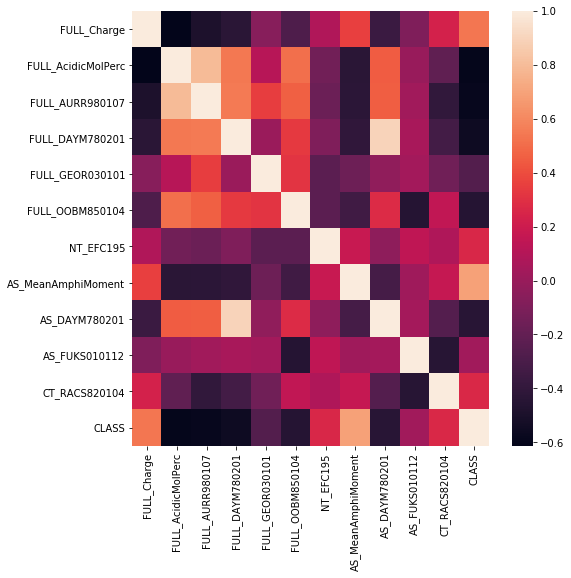

In [12]:
#plot a heat map to show the correlation of the data
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(method='pearson'))


In [13]:
#also checked the corelation in regards to the class since am trying to build a ML agorithm for that class
data.corr(method='pearson')['CLASS']

FULL_Charge           0.534602
FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
AS_MeanAmphiMoment    0.693552
AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
CT_RACS820104         0.267652
CLASS                 1.000000
Name: CLASS, dtype: float64

<Figure size 1296x1296 with 0 Axes>

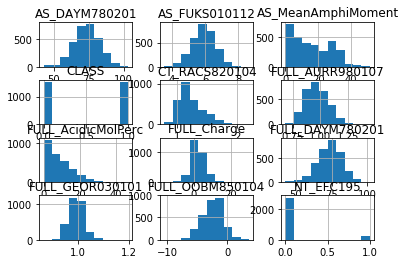

In [14]:
plt.figure(figsize=(18,18))
data.hist()
plt.show()

## 

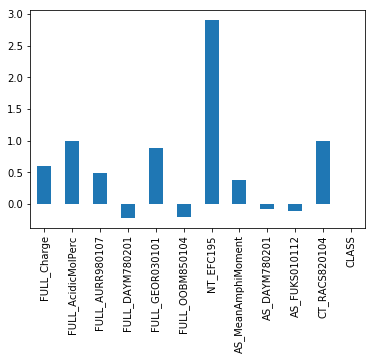

In [15]:
 data.skew().plot(kind='bar')

## understanding data with visualization

## Histogram
### I want to understand each attribute of my dataset independently

## Data pre-processing

<Figure size 1440x1440 with 0 Axes>

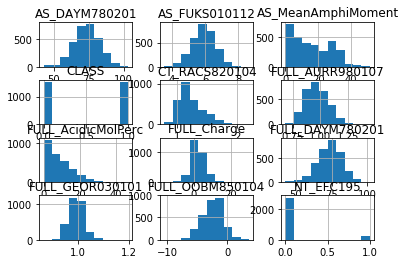

In [16]:
plt.figure(figsize=(20,20))
data.hist()
plt.show()

## Standardize data

In [17]:
from sklearn.preprocessing import StandardScaler
array = data.values
#separate array into input and output components
X = array[:,0:11]
Y = array[:,11]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
#set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 7.69712416e-01 -1.12341031e+00 -1.90047029e-01  1.37605977e-01
  -6.06718766e-01 -7.20629784e-01 -3.11684110e-01 -1.33070267e+00
  -2.25681314e-02 -3.60971652e-01 -9.25122883e-01]
 [ 5.07884366e-01 -4.10857567e-01 -3.76275096e-01 -2.43225309e-01
  -1.18128598e+00 -9.24503172e-01  3.20837658e+00 -1.30322672e+00
  -5.92370366e-01  9.02050407e-01  1.03699430e+00]
 [ 9.00626442e-01 -4.10857567e-01 -9.16336490e-01 -8.65106417e-03
  -1.05360437e+00 -4.63244125e-02 -3.11684110e-01 -1.30383154e+00
  -4.59030969e-01 -1.40916462e+00  2.31808537e+00]
 [ 7.69712416e-01 -5.74065761e-01 -7.11485617e-01 -8.70124978e-01
   1.59370848e-01  6.27395116e-01 -3.11684110e-01 -1.30201709e+00
  -7.01486075e-01 -2.30020073e+00  6.98862456e-01]
 [ 1.42428254e+00  2.04070778e-03 -3.66963693e-01 -1.04957427e+00
  -4.79037163e-01  2.00315519e-01 -3.11684110e-01 -1.30184429e+00
  -7.71259861e-02 -1.97723618e+00  1.44656245e+00]]


##  Feature selection



### Chose Recursive Feature Elimination because i dont have the library for my data in this case


In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array1 = data.values
X = array1[:,0:11]
Y = array[:,11]
# feature extraction
model = LogisticRegression()
rfe = RFE(model,8)
fit = rfe.fit(X,Y)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)

Num Features: 8
Selected Features: [ True False  True False  True  True  True  True False  True  True]
Feature Ranking: [1 3 1 2 1 1 1 1 4 1 1]


In [19]:
data.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [20]:
drop=data.drop(['FULL_AcidicMolPerc', 'FULL_DAYM780201', 'AS_DAYM780201'],axis=1)
drop



,FULL_Charge,FULL_AURR980107,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.951,0.975,-3.663,0,0.282,5.661,1.041,1
1,4.0,0.931,0.957,-4.011,1,0.600,6.537,1.453,1
2,5.5,0.873,0.961,-2.512,0,0.593,4.934,1.722,1
3,5.0,0.895,0.999,-1.362,0,0.614,4.316,1.382,1
4,7.5,0.932,0.979,-2.091,0,0.616,4.540,1.539,1
...,...,...,...,...,...,...,...,...,...
3033,1.0,0.945,1.006,-2.151,0,16.706,5.598,1.144,0
3034,-6.5,1.133,1.015,-1.675,0,16.897,6.194,1.639,0
3035,-1.5,1.091,0.991,-0.918,0,16.918,5.889,1.131,0
3036,2.0,0.849,1.017,-2.722,0,17.131,6.055,1.270,0


In [21]:
drop_test = test.drop(['FULL_AcidicMolPerc', 'FULL_DAYM780201', 'AS_DAYM780201'],axis=1)
drop_test

,FULL_Charge,FULL_AURR980107,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_FUKS010112,CT_RACS820104
0,4.0,0.873,0.987,-4.833,0,0.382,7.225,1.234
1,4.0,0.892,0.931,-0.584,0,0.320,4.942,1.853
2,2.0,0.901,1.039,-5.664,0,0.164,5.969,1.174
3,4.5,0.869,0.982,-5.423,0,2.010,5.462,1.138
4,-4.0,1.061,0.976,-2.002,0,2.758,5.582,1.453
...,...,...,...,...,...,...,...,...
753,-1.5,1.100,0.991,-1.987,0,15.185,7.053,1.325
754,-1.0,1.085,1.027,-0.745,0,16.550,6.729,1.132
755,-1.0,1.108,1.033,-1.789,0,16.112,6.036,1.219
756,-1.0,0.955,1.023,1.141,0,20.630,5.669,1.111


In [22]:
seleceted_train = X[:,fit.support_]
selected_test = test.values[:,fit.support_]

# Evaluate the Performance of Machine Learning Algorithms with Resampling¶


## Split into Train and Test Sets

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array = data.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.30
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))


Accuracy:  91.55701754385966


## K-fold Cross Validation

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = data.values
X = array[:,0:11]
Y = array[:,11]

num_folds = 10 #number of folds to use
seed = 7 #reproducibility

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Accuracy:", (results.mean()*100.0, results.std()*100.0))


Accuracy: (83.5359128018065, 27.08521320979506)


## Leave One Out Cross Validation

In [25]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

array = data.values
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy:",  (results.mean()*100.0, results.std()*100.0))

Accuracy: (91.4417379855168, 27.974673416141517)


## Repeated Random Test-Train Splits

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

array = data.values
X = array[:,0:11]
Y = array[:,11]
n_splits = 10
test_size = 0.30
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: " , (results.mean()*100.0, results.std()*100.0))


Accuracy:  (91.30482456140349, 0.5803122202806698)


# Machine Learning Algorithm Performance Metrics

## Algorithms Overview
### linear machine learning algorithms:

    Logistic Regression.
    Linear Discriminant Analysis.
### onlinear machine learning algorithms

    k-Nearest Neighbors.
    Naive Bayes.
    Classication and Regression Trees.
    Support Vector Machines.


## Linear Machine Learning Algorithms

### Logistic Regression

In [27]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = data.values
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
my_report = pd.DataFrame(output)
my_report.columns = ['CLASS']
my_report.index.name = "Index"
my_report['CLASS']=my_report['CLASS'].map({0.0:False, 1.0:True})
my_report.to_csv("report_XGB.csv")

print(my_report['CLASS'].unique())
print('False: ',my_report.groupby('CLASS').size()[0].sum())
print('True: ',my_report.groupby('CLASS').size()[1].sum())

0.835359128018065
MCC: 0.8342865299822478
[False  True]
False:  383
True:  375


In [28]:
drop

,FULL_Charge,FULL_AURR980107,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.951,0.975,-3.663,0,0.282,5.661,1.041,1
1,4.0,0.931,0.957,-4.011,1,0.600,6.537,1.453,1
2,5.5,0.873,0.961,-2.512,0,0.593,4.934,1.722,1
3,5.0,0.895,0.999,-1.362,0,0.614,4.316,1.382,1
4,7.5,0.932,0.979,-2.091,0,0.616,4.540,1.539,1
...,...,...,...,...,...,...,...,...,...
3033,1.0,0.945,1.006,-2.151,0,16.706,5.598,1.144,0
3034,-6.5,1.133,1.015,-1.675,0,16.897,6.194,1.639,0
3035,-1.5,1.091,0.991,-0.918,0,16.918,5.889,1.131,0
3036,2.0,0.849,1.017,-2.722,0,17.131,6.055,1.270,0


In [29]:
drop_test

,FULL_Charge,FULL_AURR980107,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_FUKS010112,CT_RACS820104
0,4.0,0.873,0.987,-4.833,0,0.382,7.225,1.234
1,4.0,0.892,0.931,-0.584,0,0.320,4.942,1.853
2,2.0,0.901,1.039,-5.664,0,0.164,5.969,1.174
3,4.5,0.869,0.982,-5.423,0,2.010,5.462,1.138
4,-4.0,1.061,0.976,-2.002,0,2.758,5.582,1.453
...,...,...,...,...,...,...,...,...
753,-1.5,1.100,0.991,-1.987,0,15.185,7.053,1.325
754,-1.0,1.085,1.027,-0.745,0,16.550,6.729,1.132
755,-1.0,1.108,1.033,-1.789,0,16.112,6.036,1.219
756,-1.0,0.955,1.023,1.141,0,20.630,5.669,1.111


## Linear Discriminant Analysis¶



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


array = data.values
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
lda_report = pd.DataFrame(output)
lda_report.columns = ['CLASS']
lda_report.index.name = "Index"
lda_report['CLASS']=lda_report['CLASS'].map({0.0:False, 1.0:True})
lda_report.to_csv("ldareport.csv")

print(lda_report['CLASS'].unique())
print('False: ',lda_report.groupby('CLASS').size()[0].sum())
print('True: ',lda_report.groupby('CLASS').size()[1].sum())



## Nonlinear Machine Learning Algorithms

### k-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

array = data.values
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())



model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_k = pd.DataFrame(output)
report_k.columns = ['CLASS']
report_k.index.name = "Index"
report_k['CLASS']=report_k['CLASS'].map({0.0:False, 1.0:True})
report_k.to_csv("report_k.csv")


print(report_k['CLASS'].unique())
print('False: ',report_k.groupby('CLASS').size()[0].sum())
print('True: ',report_k.groupby('CLASS').size()[1].sum())

0.8027933385443807
MCC: 0.8690586462107053
[False  True]
False:  402
True:  356


### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
array = data.values
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_bayes = pd.DataFrame(output)
report_bayes.columns = ['CLASS']
report_bayes.index.name = "Index"
report_bayes['CLASS']=report_bayes['CLASS'].map({0.0:False, 1.0:True})
report_bayes.to_csv("report_bayes.csv")


print(report_bayes['CLASS'].unique())
print('False: ',report_bayes.groupby('CLASS').size()[0].sum())
print('True: ',report_bayes.groupby('CLASS').size()[1].sum())

0.880815746048289
MCC: 0.8407203694376205
[ True False]
False:  370
True:  388


### Classiffication and Regression Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
array = data.values
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_tree = pd.DataFrame(output)
report_tree.columns = ['CLASS']
report_tree.index.name = "Index"
report_tree['CLASS']=report_tree['CLASS'].map({0.0:False, 1.0:True})
report_tree.to_csv("report_tree.csv")


print(report_tree['CLASS'].unique())
print('False: ',report_tree.groupby('CLASS').size()[0].sum())
print('True: ',report_tree.groupby('CLASS').size()[1].sum())

### Support Vector Machines 

In [ ]:
from sklearn.svm import SVC

array = data.values
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
